In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor




from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
#loading the data
cars_dataset=pd.read_excel('Car_Pricing_Data.xlsx')

# EDA

In [3]:
cars_dataset.head(10)

,Unnamed: 0,Car Name,Model,Km Driven,Fuel type,Gear Type,Price,Car Type,Location
0,1,2015 Hyundai Creta,1.6 CRDi SX Option,"75,428 kms",Diesel,Manual,"8,10,000",suv,ahmedabad
1,2,2020 Mahindra XUV500,W7,"8,898 kms",Diesel,Manual,"14,40,000",suv,ahmedabad
2,3,2020 MG Hector,Sharp MT,"28,835 kms",Petrol,Manual,"17,40,000",suv,ahmedabad
3,4,2019 Hyundai Creta,1.6 CRDi SX,"55,144 kms",Diesel,Manual,"13,10,000",suv,ahmedabad
4,5,2018 Renault Duster,Petrol RXS CVT,"32,937 kms",Petrol,Automatic,"7,20,000",suv,ahmedabad
5,6,2015 Mahindra XUV500,W10 2WD,"74,847 kms",Diesel,Manual,"8,05,000",suv,ahmedabad
6,7,2014 Audi Q3,2.0 TDI,"1,18,419 kms",Diesel,Automatic,"11,45,000",suv,ahmedabad
7,8,2018 Honda BR-V,i-DTEC S MT,"56,604 kms",Diesel,Manual,"8,50,000",suv,ahmedabad
8,9,2016 Mahindra Thar,CRDe,"50,193 kms",Diesel,Manual,"6,80,000",suv,ahmedabad
9,10,2016 Mahindra KUV 100,mFALCON G80 K4,"59,852 kms",Petrol,Manual,"3,25,000",suv,ahmedabad


In [4]:
cars_dataset.dtypes

Unnamed: 0     int64
Car Name      object
Model         object
Km Driven     object
Fuel type     object
Gear Type     object
Price         object
Car Type      object
Location      object
dtype: object

In [5]:
cars_dataset.shape

(10047, 9)

In [6]:
cars_dataset.isnull().sum()

Unnamed: 0     0
Car Name       0
Model          0
Km Driven      0
Fuel type      0
Gear Type     12
Price          0
Car Type       0
Location       0
dtype: int64

In [7]:
# removing index column and dropping null values
cars_dataset.drop(columns=['Unnamed: 0'], inplace=True)
cars_dataset.dropna(subset=['Gear Type'], inplace=True)
cars_dataset.isnull().sum()

Car Name     0
Model        0
Km Driven    0
Fuel type    0
Gear Type    0
Price        0
Car Type     0
Location     0
dtype: int64

Observation:
1. Data set shape is 10047 rows and 10 columns.
2. Price columns is the target column
3. null values are present in gear type (removed)
4. Dataset contains categorical data.
5. Numerical data is in string format.

In [8]:
# reducing the complexity of the column car name
cars_dataset[["year model", "car company", "primary model"]] = cars_dataset["Car Name"].str.split(" ",n = 2, expand = True)
cars_dataset.drop(columns=['Car Name'], inplace=True)

In [9]:
#removing km from the variables in km driven column
cars_dataset[["Km driven","not req"]] = cars_dataset["Km Driven"].str.split(" ",n = 1, expand = True)
cars_dataset.drop(columns=['Km Driven','not req'], inplace=True)
cars_dataset.head(10)

,Model,Fuel type,Gear Type,Price,Car Type,Location,year model,car company,primary model,Km driven
0,1.6 CRDi SX Option,Diesel,Manual,"8,10,000",suv,ahmedabad,2015,Hyundai,Creta,"75,428"
1,W7,Diesel,Manual,"14,40,000",suv,ahmedabad,2020,Mahindra,XUV500,"8,898"
2,Sharp MT,Petrol,Manual,"17,40,000",suv,ahmedabad,2020,MG,Hector,"28,835"
3,1.6 CRDi SX,Diesel,Manual,"13,10,000",suv,ahmedabad,2019,Hyundai,Creta,"55,144"
4,Petrol RXS CVT,Petrol,Automatic,"7,20,000",suv,ahmedabad,2018,Renault,Duster,"32,937"
5,W10 2WD,Diesel,Manual,"8,05,000",suv,ahmedabad,2015,Mahindra,XUV500,"74,847"
6,2.0 TDI,Diesel,Automatic,"11,45,000",suv,ahmedabad,2014,Audi,Q3,"1,18,419"
7,i-DTEC S MT,Diesel,Manual,"8,50,000",suv,ahmedabad,2018,Honda,BR-V,"56,604"
8,CRDe,Diesel,Manual,"6,80,000",suv,ahmedabad,2016,Mahindra,Thar,"50,193"
9,mFALCON G80 K4,Petrol,Manual,"3,25,000",suv,ahmedabad,2016,Mahindra,KUV 100,"59,852"


In [10]:
#removing comma mark present in the variables
cars_dataset["Km driven"] = cars_dataset["Km driven"].str.replace(',', '')
cars_dataset["Price"]= cars_dataset["Price"].str.replace(',', '')
cars_dataset["Km driven"]=pd.to_numeric(cars_dataset["Km driven"])
cars_dataset["year model"]=pd.to_numeric(cars_dataset["year model"])
cars_dataset["Price"]=pd.to_numeric(cars_dataset["Price"])
cars_dataset.dtypes

Model            object
Fuel type        object
Gear Type        object
Price             int64
Car Type         object
Location         object
year model        int64
car company      object
primary model    object
Km driven         int64
dtype: object

In [11]:
cars_dataset.head(10)

,Model,Fuel type,Gear Type,Price,Car Type,Location,year model,car company,primary model,Km driven
0,1.6 CRDi SX Option,Diesel,Manual,810000,suv,ahmedabad,2015,Hyundai,Creta,75428
1,W7,Diesel,Manual,1440000,suv,ahmedabad,2020,Mahindra,XUV500,8898
2,Sharp MT,Petrol,Manual,1740000,suv,ahmedabad,2020,MG,Hector,28835
3,1.6 CRDi SX,Diesel,Manual,1310000,suv,ahmedabad,2019,Hyundai,Creta,55144
4,Petrol RXS CVT,Petrol,Automatic,720000,suv,ahmedabad,2018,Renault,Duster,32937
5,W10 2WD,Diesel,Manual,805000,suv,ahmedabad,2015,Mahindra,XUV500,74847
6,2.0 TDI,Diesel,Automatic,1145000,suv,ahmedabad,2014,Audi,Q3,118419
7,i-DTEC S MT,Diesel,Manual,850000,suv,ahmedabad,2018,Honda,BR-V,56604
8,CRDe,Diesel,Manual,680000,suv,ahmedabad,2016,Mahindra,Thar,50193
9,mFALCON G80 K4,Petrol,Manual,325000,suv,ahmedabad,2016,Mahindra,KUV 100,59852


In [12]:
cars_dataset.nunique()

Model            2155
Fuel type           4
Gear Type           2
Price            1927
Car Type            6
Location            8
year model         24
car company        33
primary model     275
Km driven        4289
dtype: int64

In [13]:
x=['Fuel type','Gear Type','Car Type','Location','year model','car company']
for i in x:
    print(cars_dataset[i].value_counts(),'\n\n')

Petrol    5523
Diesel    4362
CNG        134
LPG         16
Name: Fuel type, dtype: int64 


Manual       6932
Automatic    3103
Name: Gear Type, dtype: int64 


hatchback    3851
sedan        3042
suv          2491
muv           577
minivan        54
luxury         20
Name: Car Type, dtype: int64 


mumbai       2670
new-delhi    2330
bangalore    1485
chennai       896
hyderabad     886
kolkata       711
ahmedabad     586
jaipur        471
Name: Location, dtype: int64 


2016    1177
2017    1156
2018    1084
2015    1035
2014    1012
2013     842
2012     716
2019     712
2011     520
2020     514
2010     391
2021     278
2009     233
2008     189
2007      99
2006      28
2004      15
2005      13
2002       8
2022       4
2003       4
2001       2
2000       2
1981       1
Name: year model, dtype: int64 


Maruti           2427
Hyundai          2007
Honda            1096
Toyota            656
Mahindra          549
Mercedes-Benz     435
Volkswagen        366
BMW               344


# Visualization

Fuel type


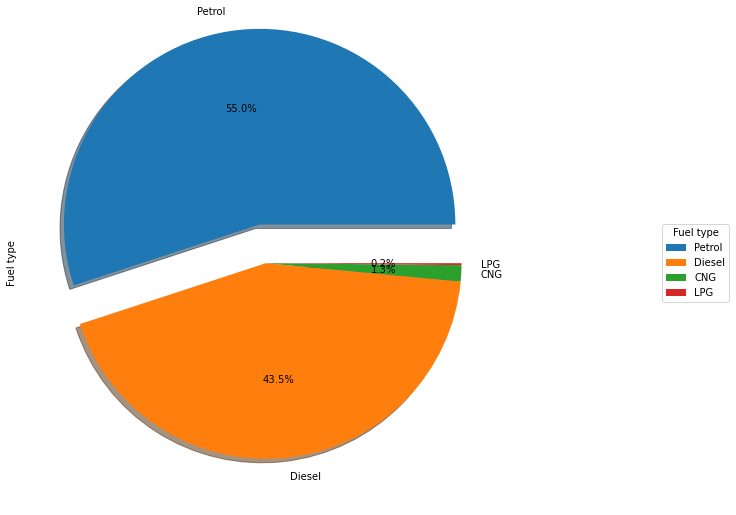




Gear Type


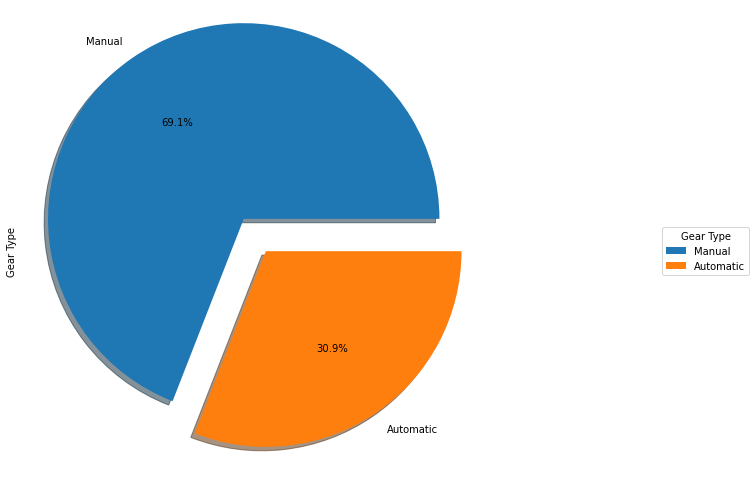




Car Type


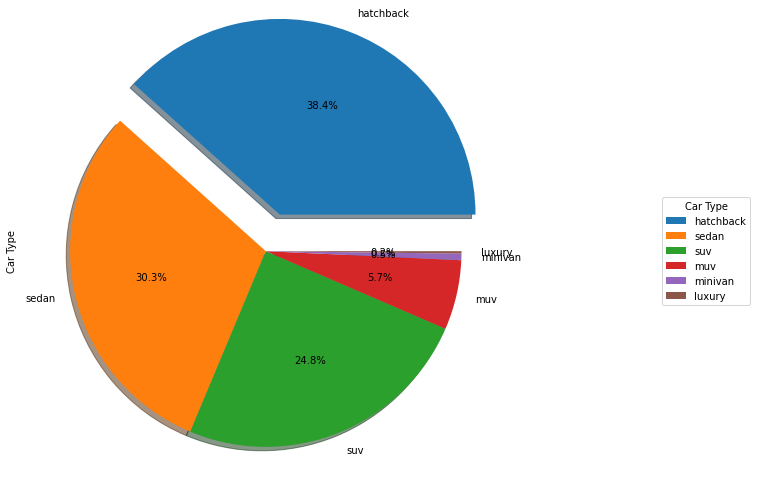




Location


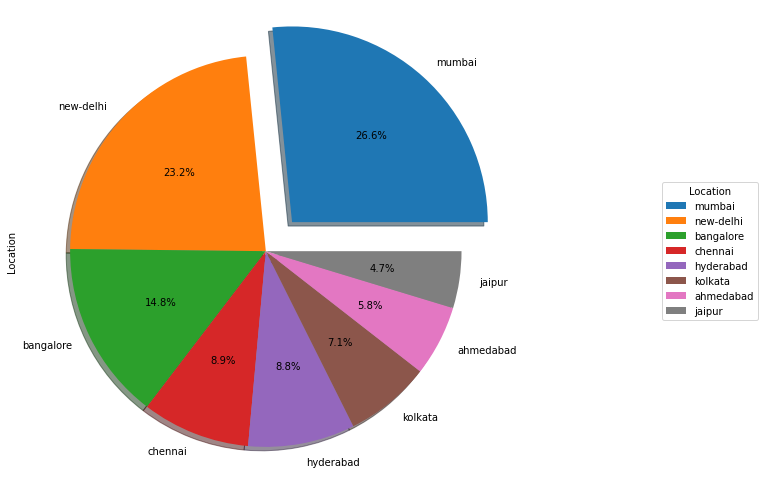




year model


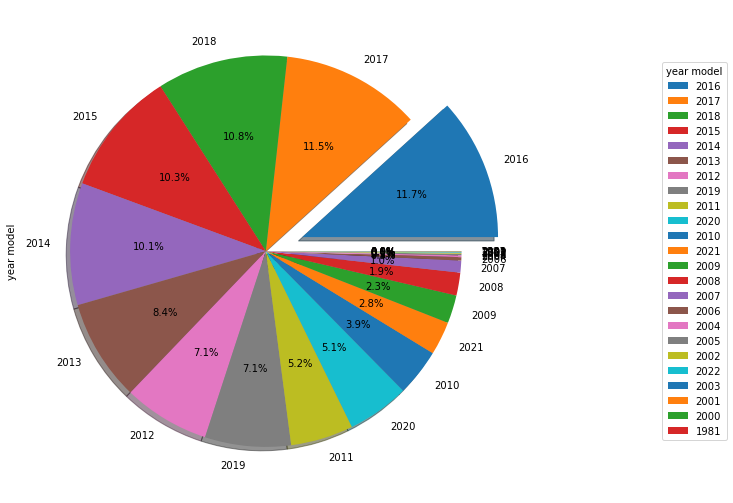




car company


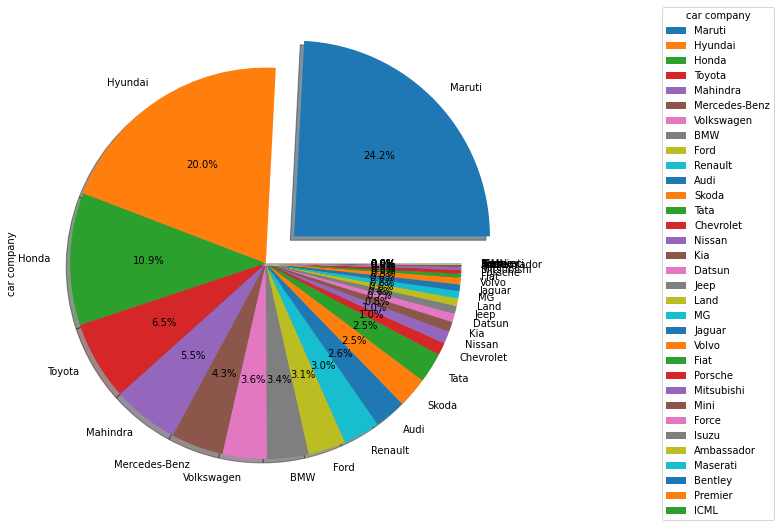

In [14]:

column=['Fuel type','Gear Type','Car Type','Location','year model','car company']
for i in range(0,len(column)):
    l=column[i]
    print('\033[1m'+l+'\033[1m')
    y=cars_dataset[column[i]].value_counts()
    exp=[0.2]
    j=int(cars_dataset[column[i]].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =column[i],loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

Text(0, 0.5, 'Price ')

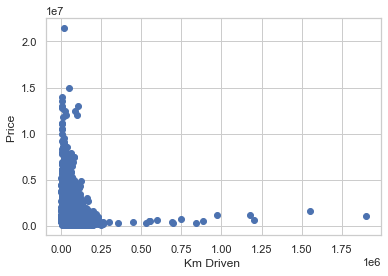

In [33]:
g=plt.scatter(cars_dataset['Km driven'], cars_dataset['Price'])
g.axes.set_xlabel('Km Driven ')
g.axes.set_ylabel('Price ')

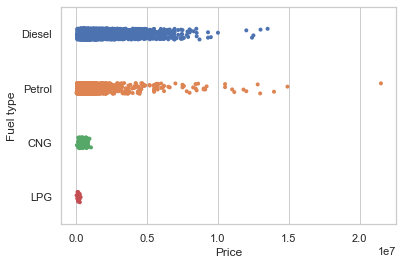

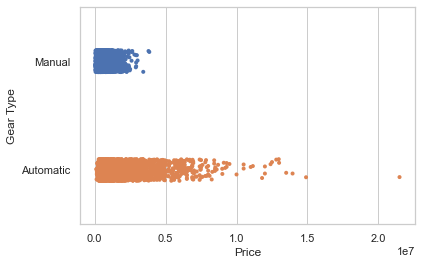

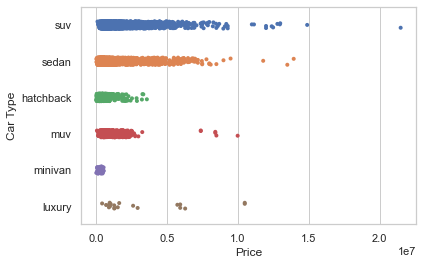

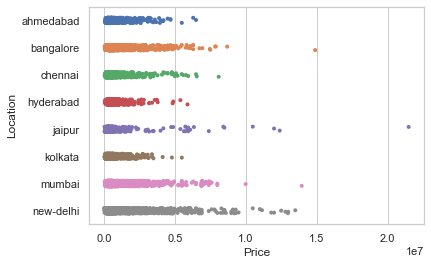

In [15]:
for i in range(0,len(column)):
    l=int(cars_dataset[column[i]].nunique())
    if l<=20:
        sns.set(style = 'whitegrid')         
        sns.stripplot(y=column[i], x="Price", data=cars_dataset,size=4)  
        plt.show()

<AxesSubplot:xlabel='count', ylabel='Location'>

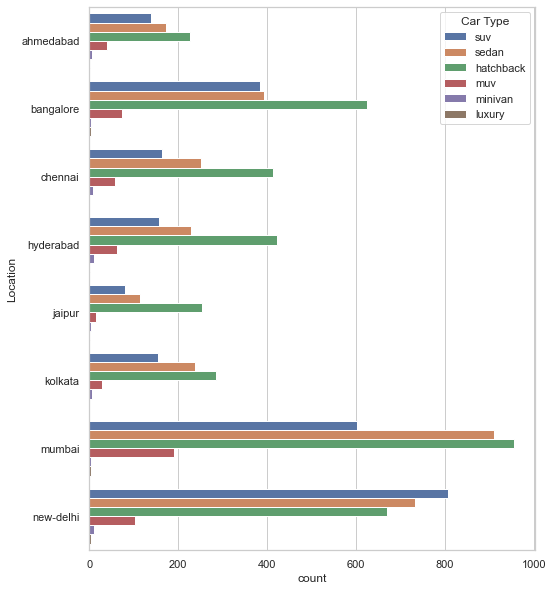

In [19]:
plt.figure(figsize = (8,10))
sns.countplot(y='Location', hue="Car Type", data=cars_dataset)

In [21]:
cars_dataset['Car Type'].replace('luxury','sedan',inplace=True)
cars_dataset['Car Type'].replace('minivan','muv',inplace=True)
cars_dataset.loc[cars_dataset['year model']<2008, 'year model'] = 2008
cars_dataset.loc[cars_dataset['year model']==2022, 'year model'] = 2021
cars_dataset.loc[cars_dataset['Fuel type']=='LPG', 'Fuel type'] = 'CNG'

In [22]:
print(cars_dataset['Car Type'].value_counts(),'\n\n')
print(cars_dataset['year model'].value_counts(),'\n\n')
print(cars_dataset['Fuel type'].value_counts())

hatchback    3851
sedan        3062
suv          2491
muv           631
Name: Car Type, dtype: int64 


2016    1177
2017    1156
2018    1084
2015    1035
2014    1012
2013     842
2012     716
2019     712
2011     520
2020     514
2010     391
2008     361
2021     282
2009     233
Name: year model, dtype: int64 


Petrol    5523
Diesel    4362
CNG        150
Name: Fuel type, dtype: int64


In [23]:
cars_dataset.loc[cars_dataset['Fuel type']=='CNG']

,Model,Fuel type,Gear Type,Price,Car Type,Location,year model,car company,primary model,Km driven
187,1.8 G CNG,CNG,Manual,195000,sedan,ahmedabad,2008,Toyota,Corolla Altis,130000
248,1.2 S STD CNG,CNG,Manual,600000,sedan,ahmedabad,2020,Maruti,Swift Dzire Tour,50000
277,Green Vxi (CNG),CNG,Manual,185000,sedan,ahmedabad,2010,Maruti,SX4,80000
331,Sportz CNG BSIV,CNG,Manual,570000,hatchback,ahmedabad,2019,Hyundai,Santro,32706
364,LXI CNG,CNG,Manual,240000,hatchback,ahmedabad,2012,Maruti,Wagon R,100000
...,...,...,...,...,...,...,...,...,...,...
10034,5 STR With AC Plus HTR CNG,CNG,Manual,355000,muv,new-delhi,2017,Maruti,Eeco,24000
10036,5 STR With AC Plus HTR CNG,CNG,Manual,175000,muv,new-delhi,2012,Maruti,Eeco,120000
10037,CNG,CNG,Manual,150000,muv,new-delhi,2013,Maruti,Omni,50000
10038,CNG 5 Seater AC,CNG,Manual,290000,muv,new-delhi,2015,Maruti,Eeco,56000


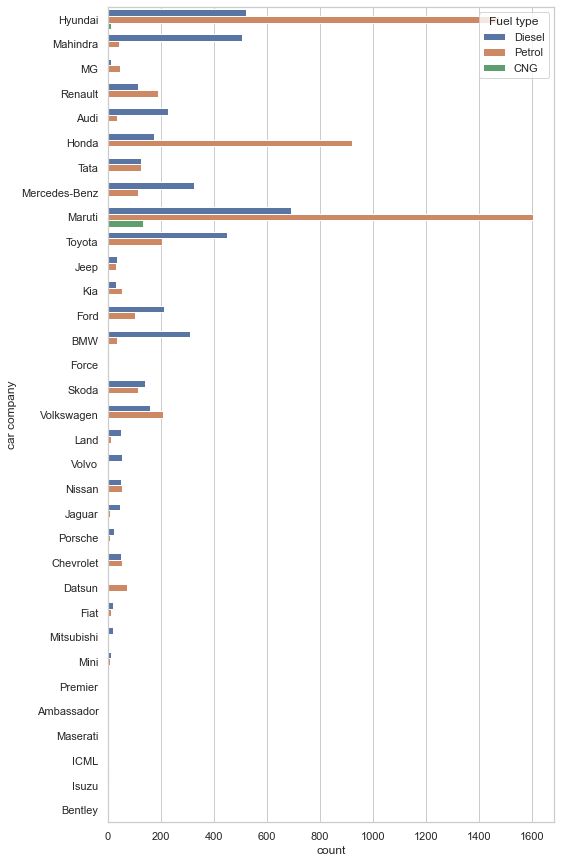

In [24]:
plt.figure(figsize = (8,15))
sns.countplot(hue="Fuel type",y="car company", data=cars_dataset)  
plt.show()

In [25]:
#removing minority data ( outliers )
cars_dataset['car company'].replace('Bentley',np.nan,inplace=True)
cars_dataset['car company'].replace('Isuzu',np.nan,inplace=True)
cars_dataset['car company'].replace('ICML',np.nan,inplace=True)
cars_dataset['car company'].replace('Maserati',np.nan,inplace=True)
cars_dataset['car company'].replace('Ambassador',np.nan,inplace=True)
cars_dataset['car company'].replace('Premier',np.nan,inplace=True)
cars_dataset['car company'].replace('Force',np.nan,inplace=True)
cars_dataset['Fuel type'].replace('CNG',np.nan,inplace=True)

In [26]:
cars_dataset['car company'].isnull().sum()

14

In [27]:
cars_dataset.dropna(subset=['car company'], inplace=True)
cars_dataset.dropna(subset=['Fuel type'], inplace=True)

In [28]:
cars_dataset.shape

(9871, 10)

<AxesSubplot:xlabel='count', ylabel='car company'>

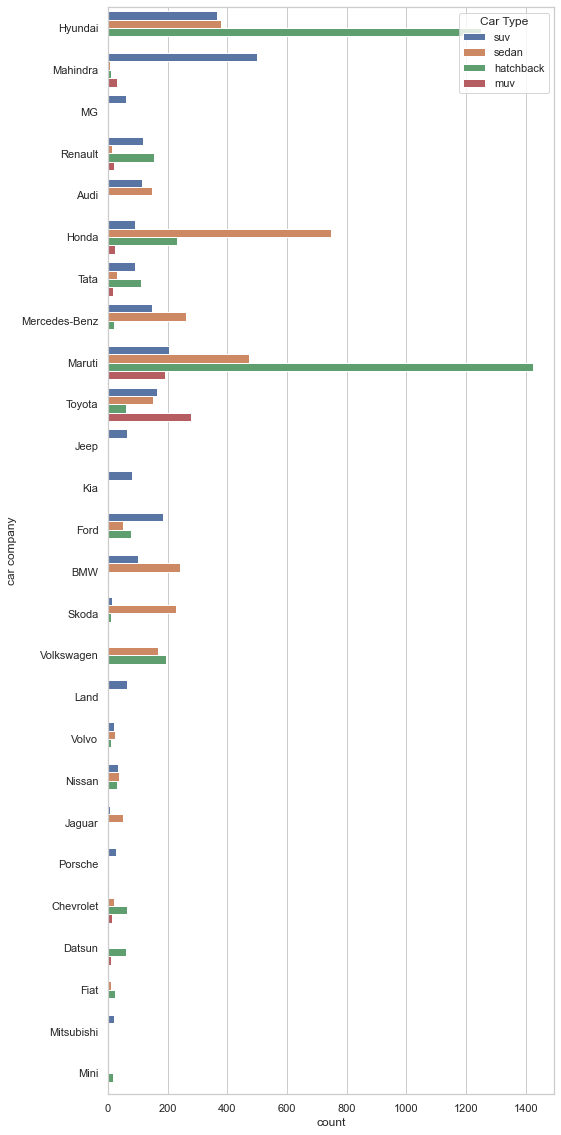

In [30]:
plt.figure(figsize = (8,20))
sns.countplot(y='car company', hue="Car Type", data=cars_dataset)

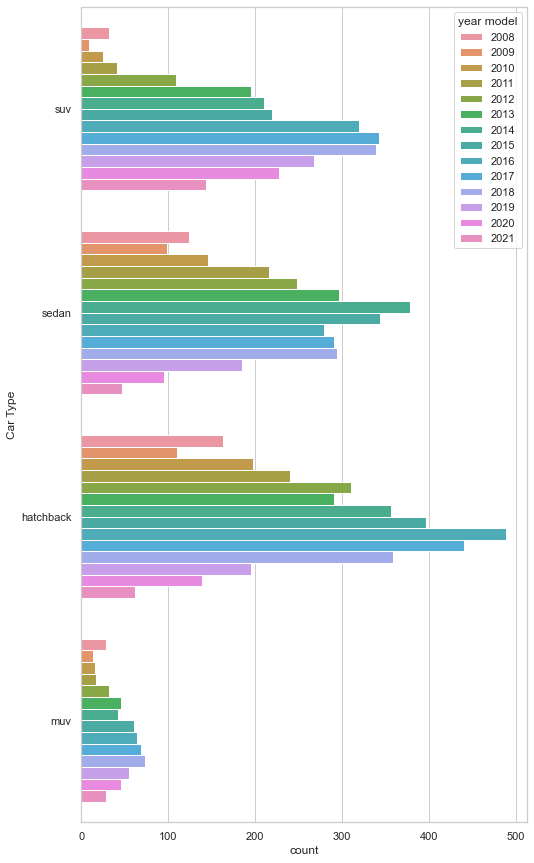

In [32]:
plt.figure(figsize = (8,15))
sns.countplot(hue="year model",y="Car Type", data=cars_dataset)  
plt.show()

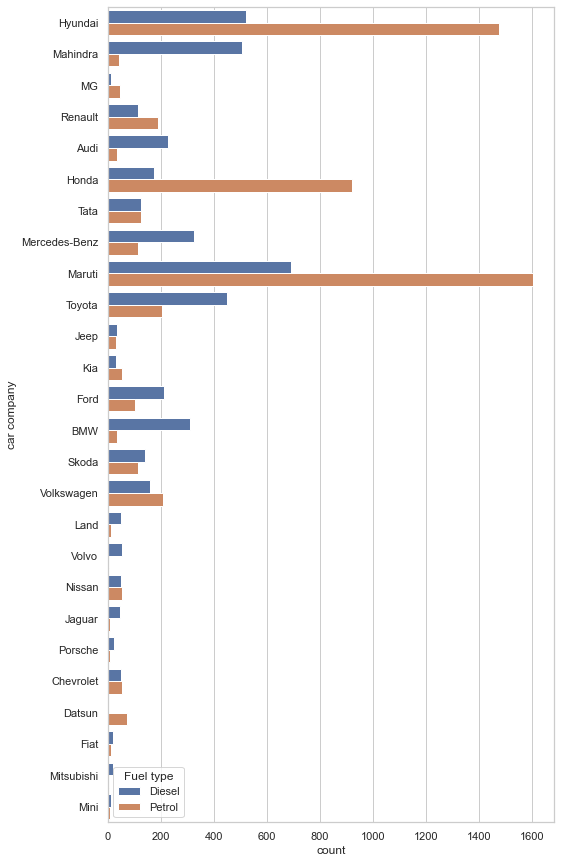

In [24]:
plt.figure(figsize = (8,15))
sns.countplot(hue="Fuel type",y="car company", data=cars_dataset)  
plt.show()

Visualization Observation:
1. Petrol is most used fuel by the automobile followed by diesel. LPG and CNG make only tiny fraction.
2. Manual gear type the most used gear type in automobiles.
3. Hatchback, sedan and suv occupy 1/3 data each and there are barely luxury cars and minivans.
4. Mumbai, New Delhi and Bangalore has the most used automobile for sale.
5. 2014-2018 car model are cars which are most sold.
6. Maruti followed by Hyundai and Honda are the major car companies which are up for sale.
7. Car price is inversely proportional to Km driven.
8. Price of diesel vehicles is more compared to petrol driven cars.
9. Manual gear type cars are cheaper compared to Automatic transmission cars.
10. SUV and Sedan are the most expensive car type.
11. Delhi is city the where most expensive cars are sold, budget oriented cars are available in hypderabad and jaipur.
12. All cities except for Delhi primarily sells hatchback cars whereas for Delhi it is SUV.
13. Maruti and Hyundai are major car companies which are on sales.
14. Most number of SUV and Hatchback are of 2017 model.
15. Most number of Sedan are of 2014 model.
16. Most number of MUV are of 2018 model.

In [25]:
cars_dataset['car company'].replace('Mini','BMW',inplace=True)

In [26]:
cars_dataset.dtypes

Model            object
Fuel type        object
Gear Type        object
Price             int64
Car Type         object
Location         object
year model        int64
car company      object
primary model    object
Km driven         int64
dtype: object

In [27]:
for i in cars_dataset:
    print(i,' :',cars_dataset[i].nunique())

Model  : 2101
Fuel type  : 2
Gear Type  : 2
Price  : 1907
Car Type  : 4
Location  : 8
year model  : 14
car company  : 25
primary model  : 266
Km driven  : 4241


In [28]:
car_type=pd.get_dummies(cars_dataset['Car Type'])
loco=pd.get_dummies(cars_dataset['Location'])
year=pd.get_dummies(cars_dataset['year model'])
car_com=pd.get_dummies(cars_dataset['car company'])

In [29]:
new_set=pd.concat([cars_dataset,car_type,loco,year,car_com],axis='columns')

In [30]:
pd.set_option("display.max_columns", None)
new_set.head()

,Model,Fuel type,Gear Type,Price,Car Type,Location,year model,car company,primary model,Km driven,hatchback,muv,sedan,suv,ahmedabad,bangalore,chennai,hyderabad,jaipur,kolkata,mumbai,new-delhi,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,1.6 CRDi SX Option,Diesel,Manual,810000,suv,ahmedabad,2015,Hyundai,Creta,75428,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,W7,Diesel,Manual,1440000,suv,ahmedabad,2020,Mahindra,XUV500,8898,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Sharp MT,Petrol,Manual,1740000,suv,ahmedabad,2020,MG,Hector,28835,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.6 CRDi SX,Diesel,Manual,1310000,suv,ahmedabad,2019,Hyundai,Creta,55144,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Petrol RXS CVT,Petrol,Automatic,720000,suv,ahmedabad,2018,Renault,Duster,32937,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
cars_datasets=new_set.drop(columns=['Model','Car Type','Location','year model','car company',
                               'suv','mumbai',2008,'Maruti'])

In [32]:
cars_datasets.head()

,Fuel type,Gear Type,Price,primary model,Km driven,hatchback,muv,sedan,ahmedabad,bangalore,chennai,hyderabad,jaipur,kolkata,new-delhi,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land,MG,Mahindra,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Diesel,Manual,810000,Creta,75428,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Diesel,Manual,1440000,XUV500,8898,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Petrol,Manual,1740000,Hector,28835,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Diesel,Manual,1310000,Creta,55144,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Petrol,Automatic,720000,Duster,32937,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
# fetchning count of each unique element in the dataset of each column
for i in cars_datasets:
    print(cars_datasets[i].value_counts(),'\n\n')

Petrol    5520
Diesel    4351
Name: Fuel type, dtype: int64 


Manual       6773
Automatic    3098
Name: Gear Type, dtype: int64 


450000     115
550000     111
425000     104
525000     104
325000      98
          ... 
292200       1
287100       1
535700       1
280800       1
1677777      1
Name: Price, Length: 1907, dtype: int64 


City              480
i20               423
Swift             380
Grand i10         333
Swift Dzire       291
                 ... 
Supro               1
CrossPolo           1
Grand Cherokee      1
Captur              1
5 DOOR              1
Name: primary model, Length: 266, dtype: int64 


60000    159
70000    151
65000    145
50000    134
80000    134
        ... 
71105      1
64305      1
16958      1
78751      1
39508      1
Name: Km driven, Length: 4241, dtype: int64 


0    6120
1    3751
Name: hatchback, dtype: int64 


0    9277
1     594
Name: muv, dtype: int64 


0    6828
1    3043
Name: sedan, dtype: int64 


0    9296
1     575
Name: ahm

In [34]:
#converting categorical data into numerical data
le=LabelEncoder()
for i in cars_datasets:
    if cars_datasets[i].dtype=='object':
         cars_datasets[i]=le.fit_transform(cars_datasets[i])

In [35]:
cars_datasets.dtypes

Fuel type        int32
Gear Type        int32
Price            int64
primary model    int32
Km driven        int64
hatchback        uint8
muv              uint8
sedan            uint8
ahmedabad        uint8
bangalore        uint8
chennai          uint8
hyderabad        uint8
jaipur           uint8
kolkata          uint8
new-delhi        uint8
2009             uint8
2010             uint8
2011             uint8
2012             uint8
2013             uint8
2014             uint8
2015             uint8
2016             uint8
2017             uint8
2018             uint8
2019             uint8
2020             uint8
2021             uint8
Audi             uint8
BMW              uint8
Chevrolet        uint8
Datsun           uint8
Fiat             uint8
Ford             uint8
Honda            uint8
Hyundai          uint8
Jaguar           uint8
Jeep             uint8
Kia              uint8
Land             uint8
MG               uint8
Mahindra         uint8
Mercedes-Benz    uint8
Mitsubishi 

In [36]:
cars_datasets.head()

,Fuel type,Gear Type,Price,primary model,Km driven,hatchback,muv,sedan,ahmedabad,bangalore,chennai,hyderabad,jaipur,kolkata,new-delhi,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land,MG,Mahindra,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,1,810000,69,75428,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1440000,254,8898,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1740000,113,28835,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1310000,69,55144,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,720000,72,32937,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


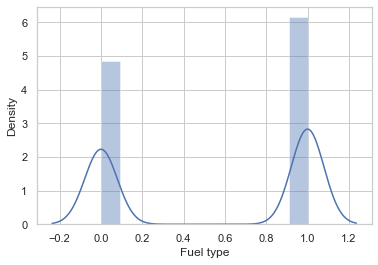

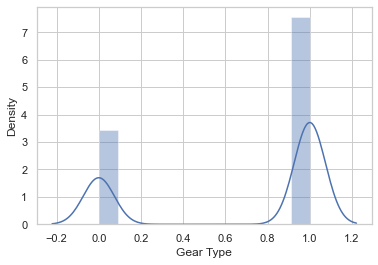

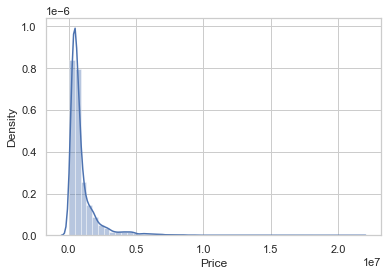

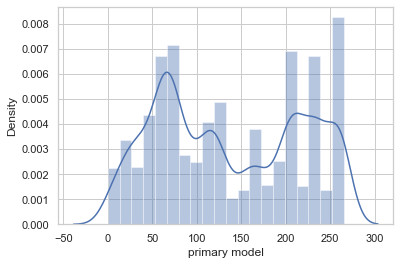

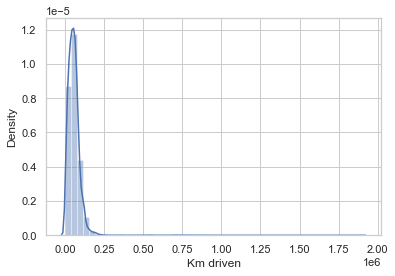

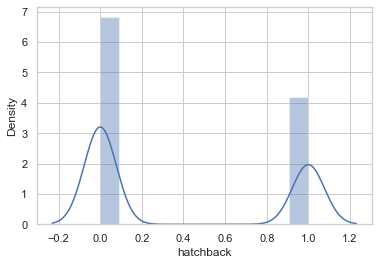

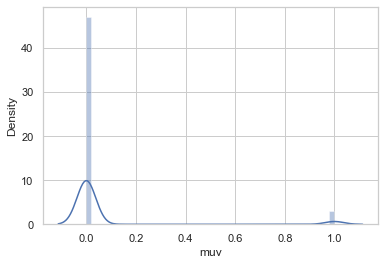

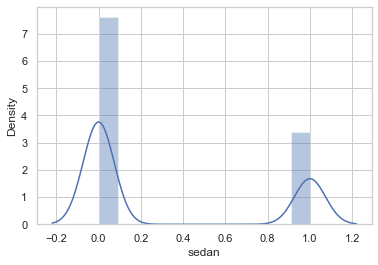

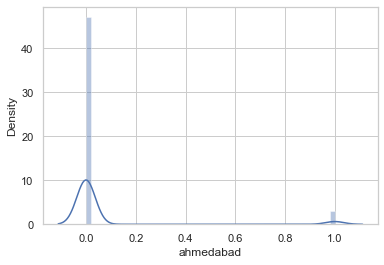

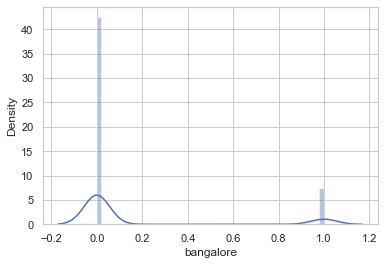

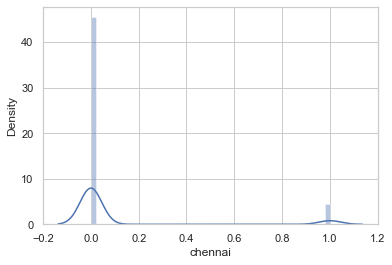

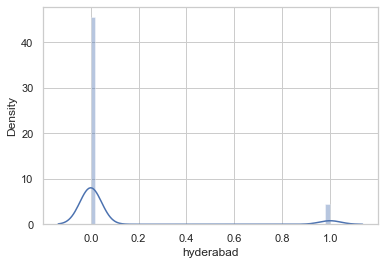

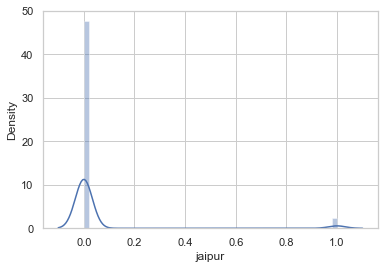

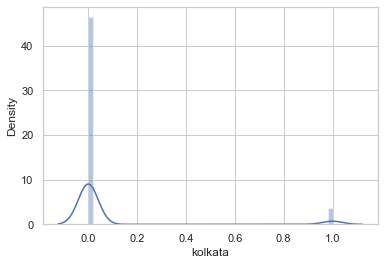

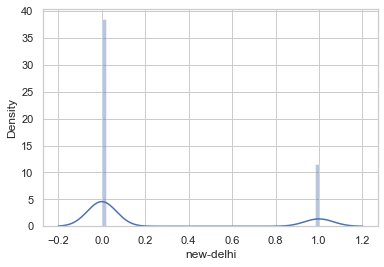

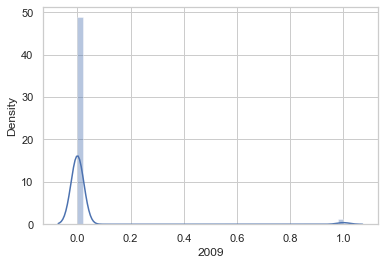

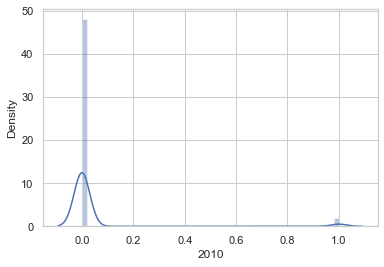

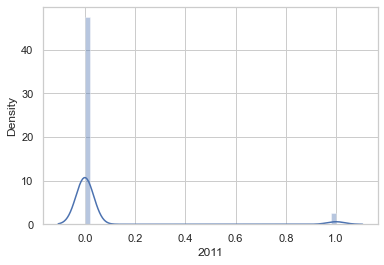

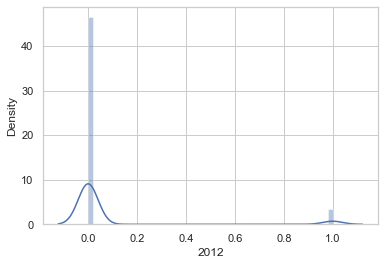

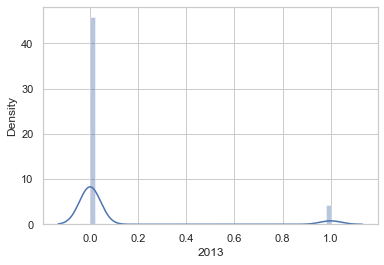

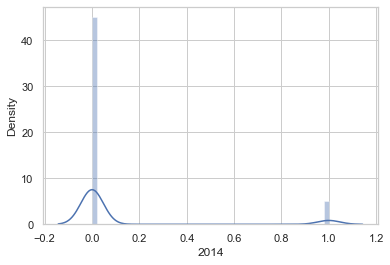

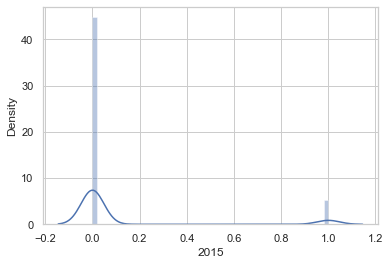

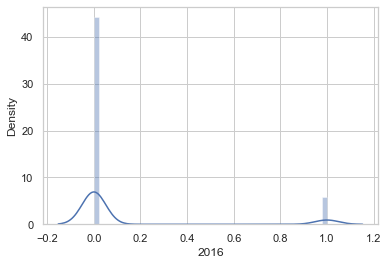

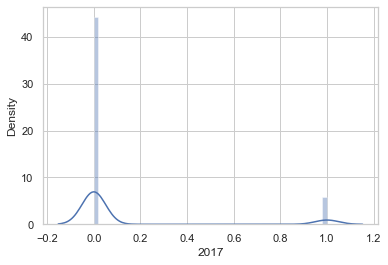

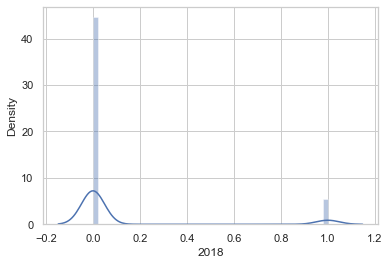

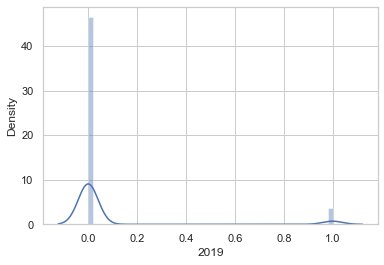

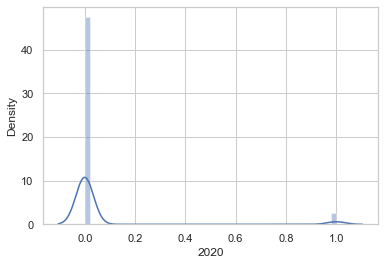

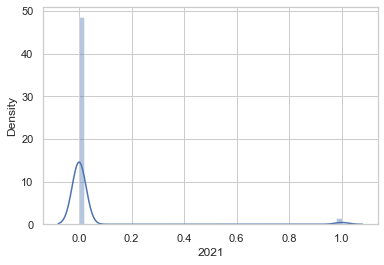

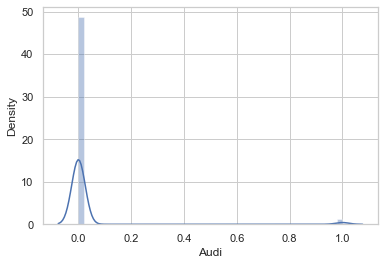

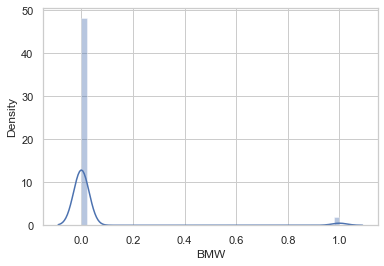

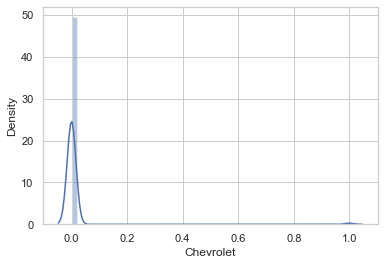

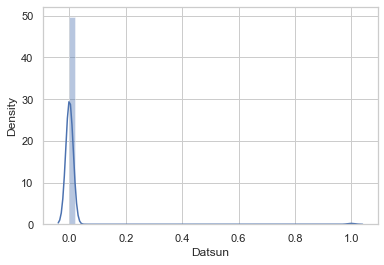

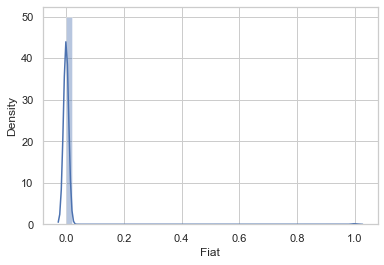

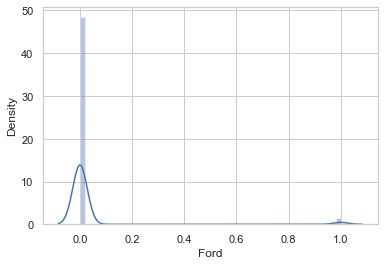

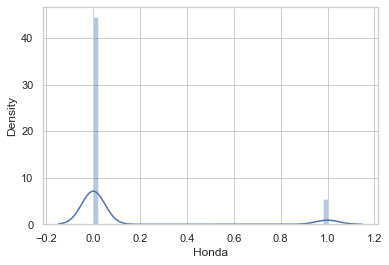

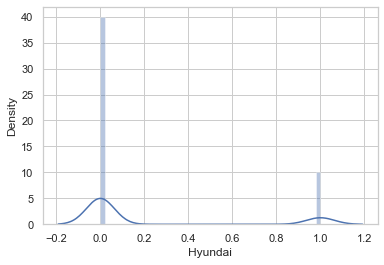

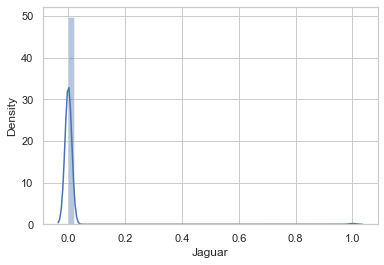

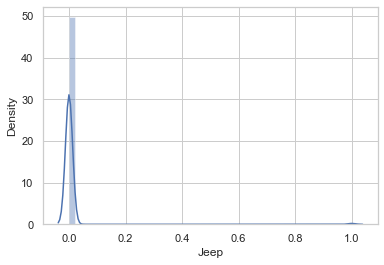

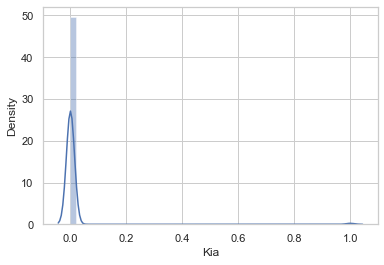

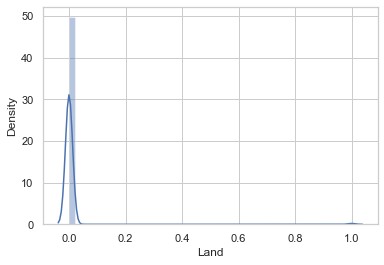

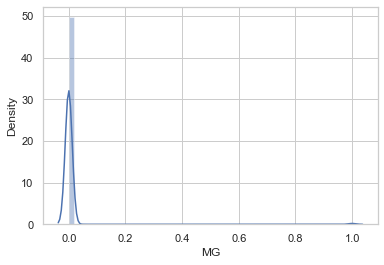

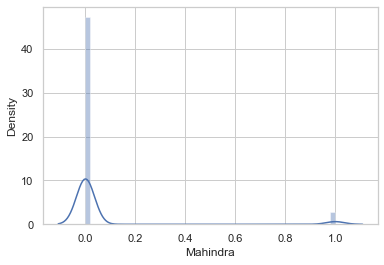

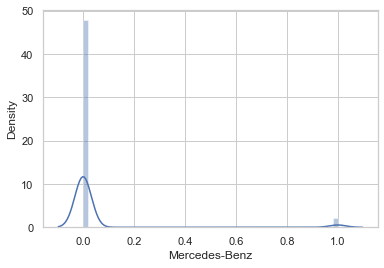

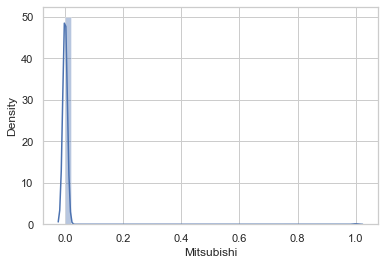

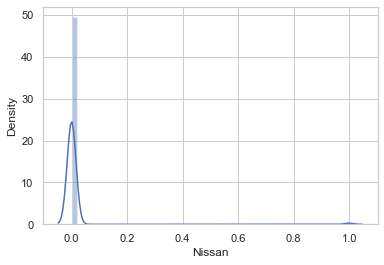

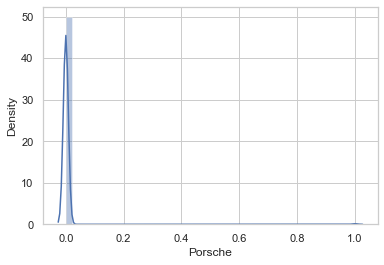

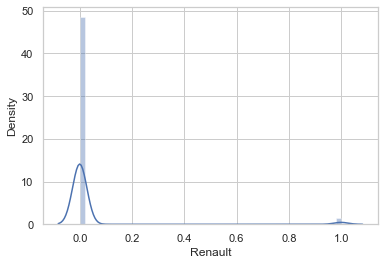

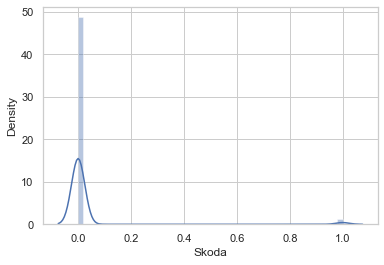

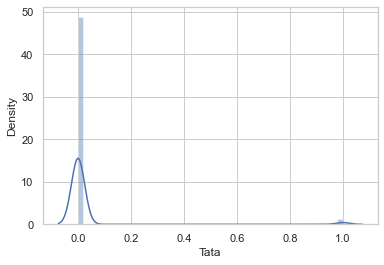

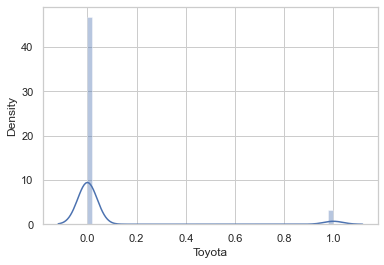

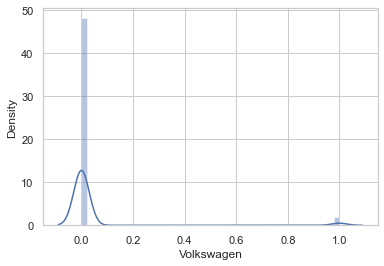

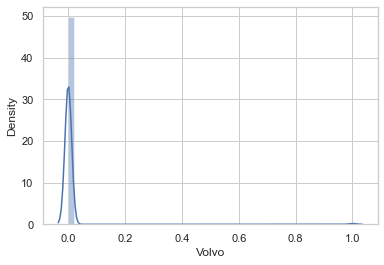

In [37]:
for j in cars_datasets:
    sns.distplot(cars_datasets[j])
    plt.show()

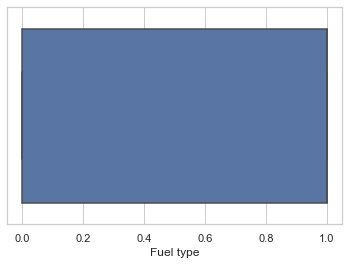

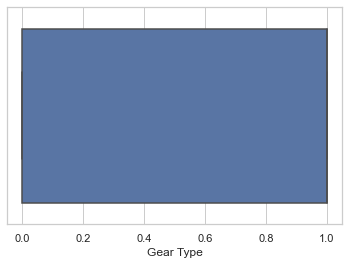

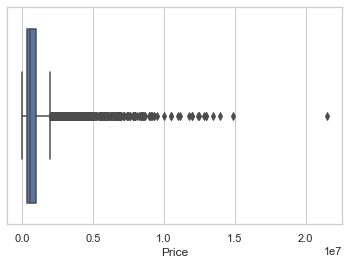

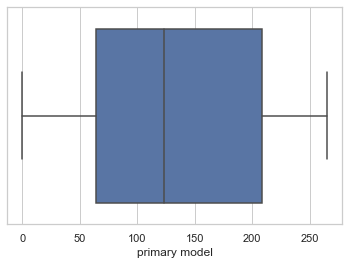

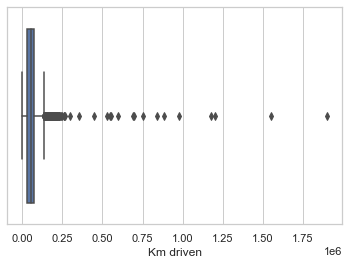

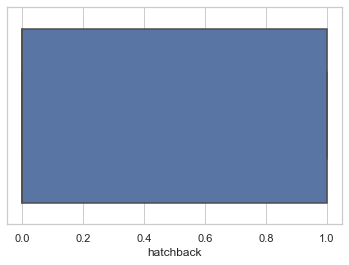

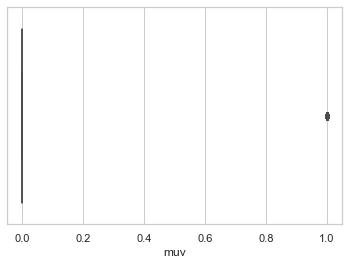

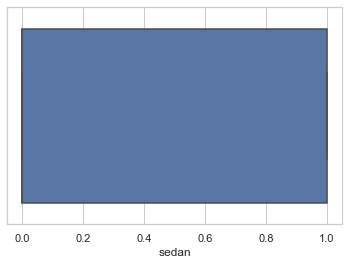

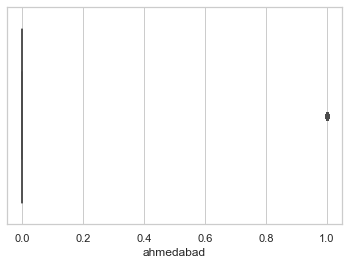

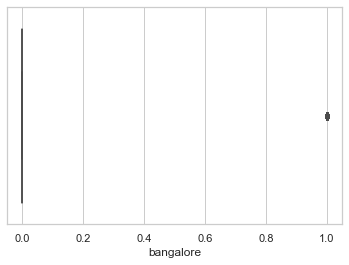

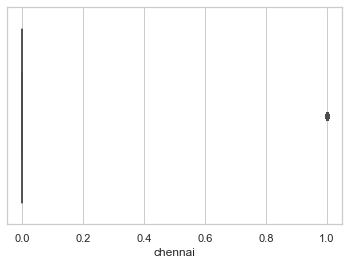

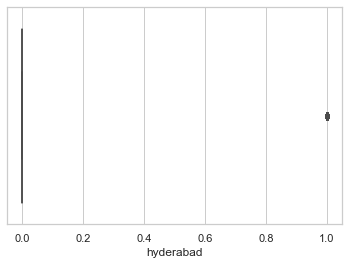

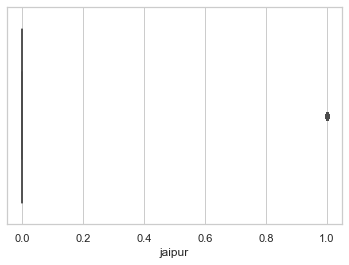

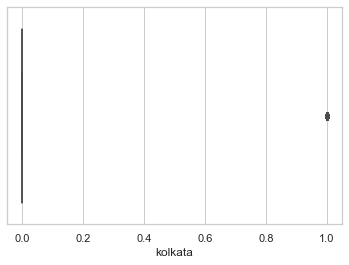

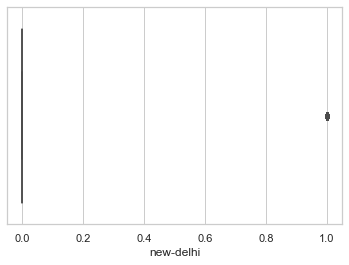

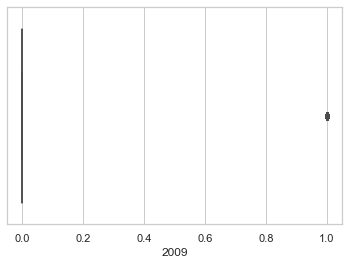

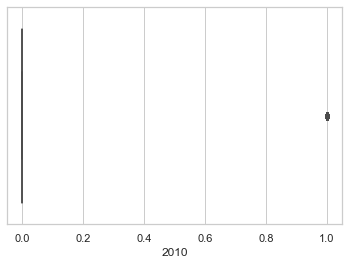

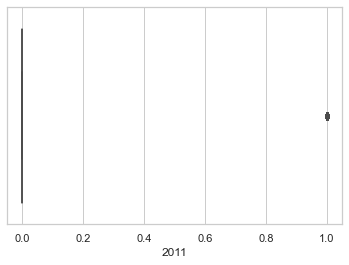

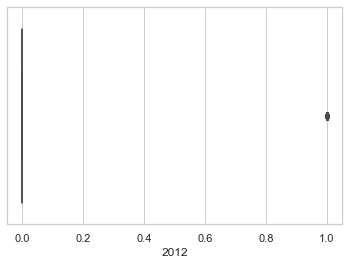

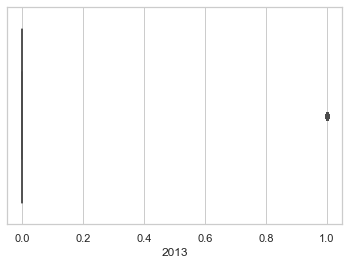

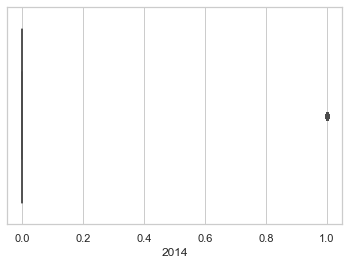

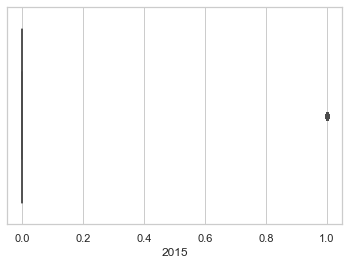

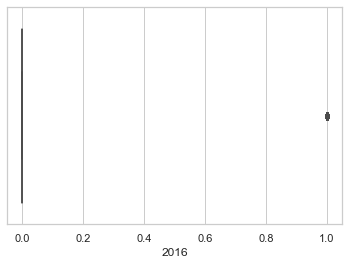

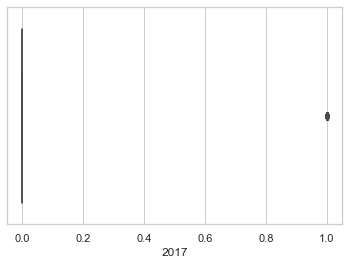

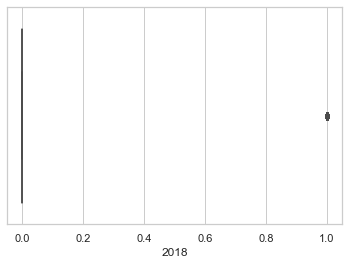

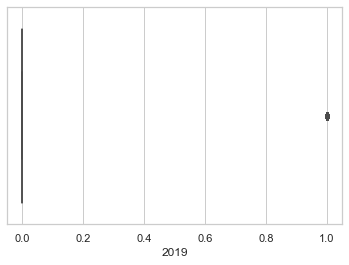

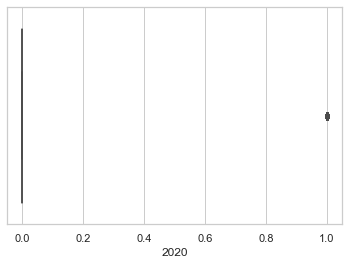

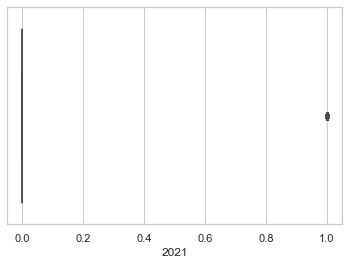

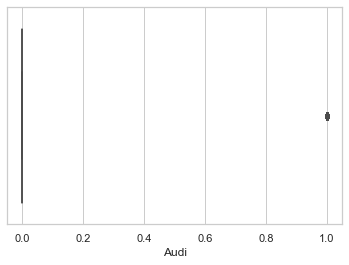

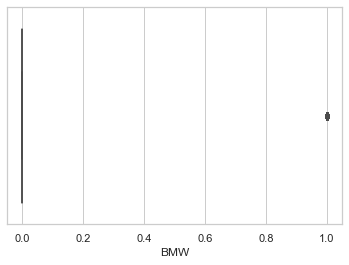

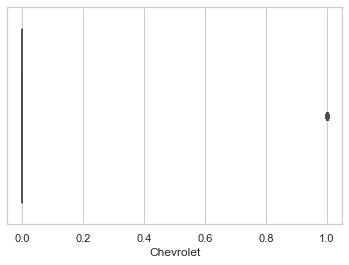

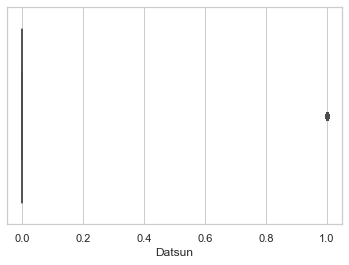

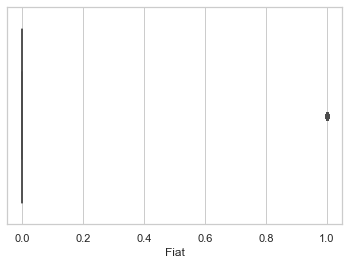

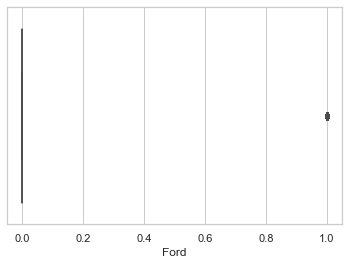

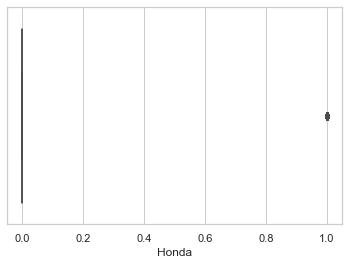

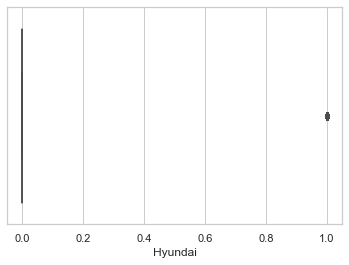

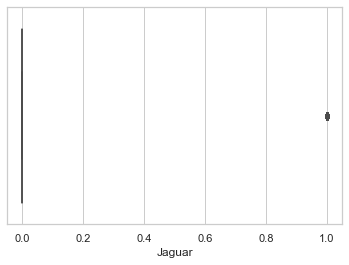

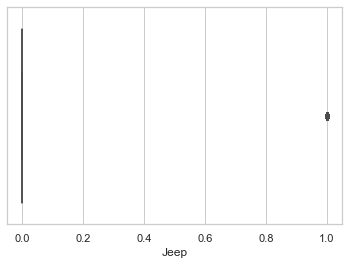

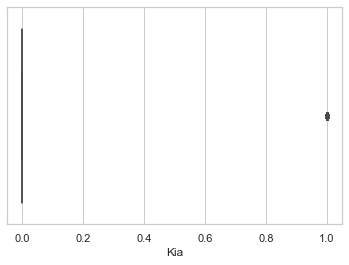

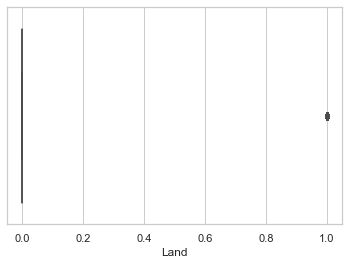

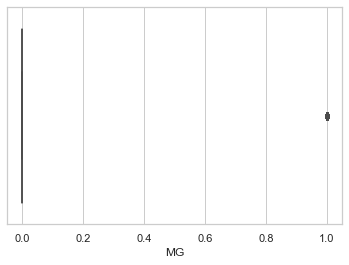

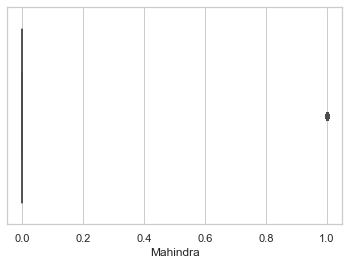

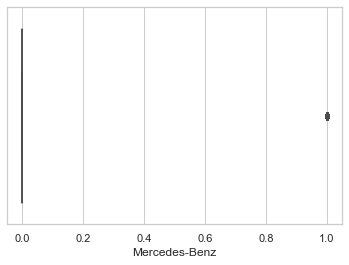

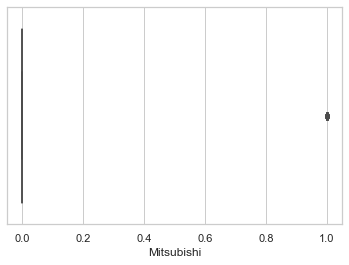

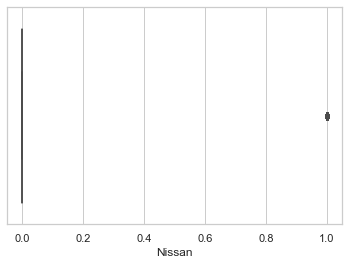

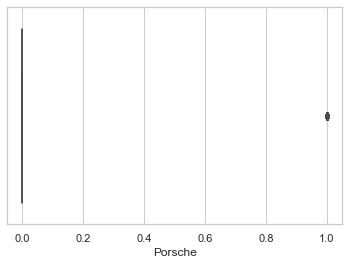

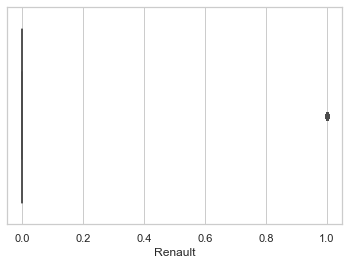

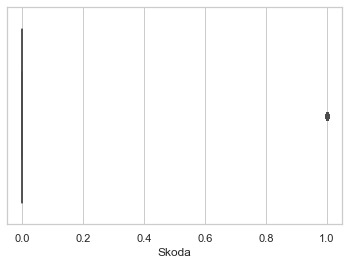

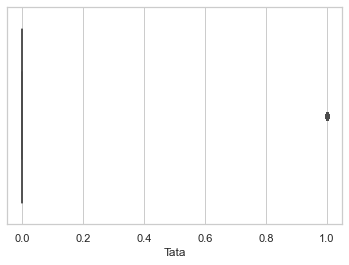

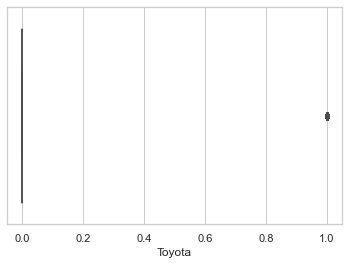

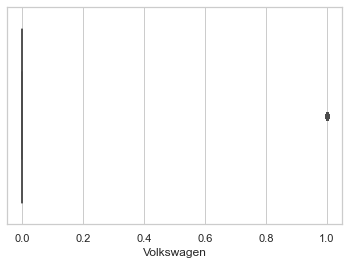

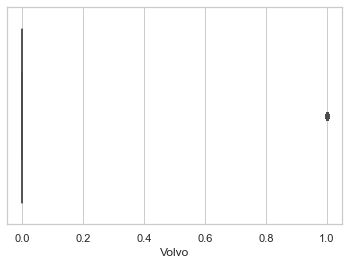

In [38]:
for k in cars_datasets:
    sns.boxplot(cars_datasets[k])
    plt.show()

In [39]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [40]:
out(cars_datasets,'Price')
out(cars_datasets,'Km driven')

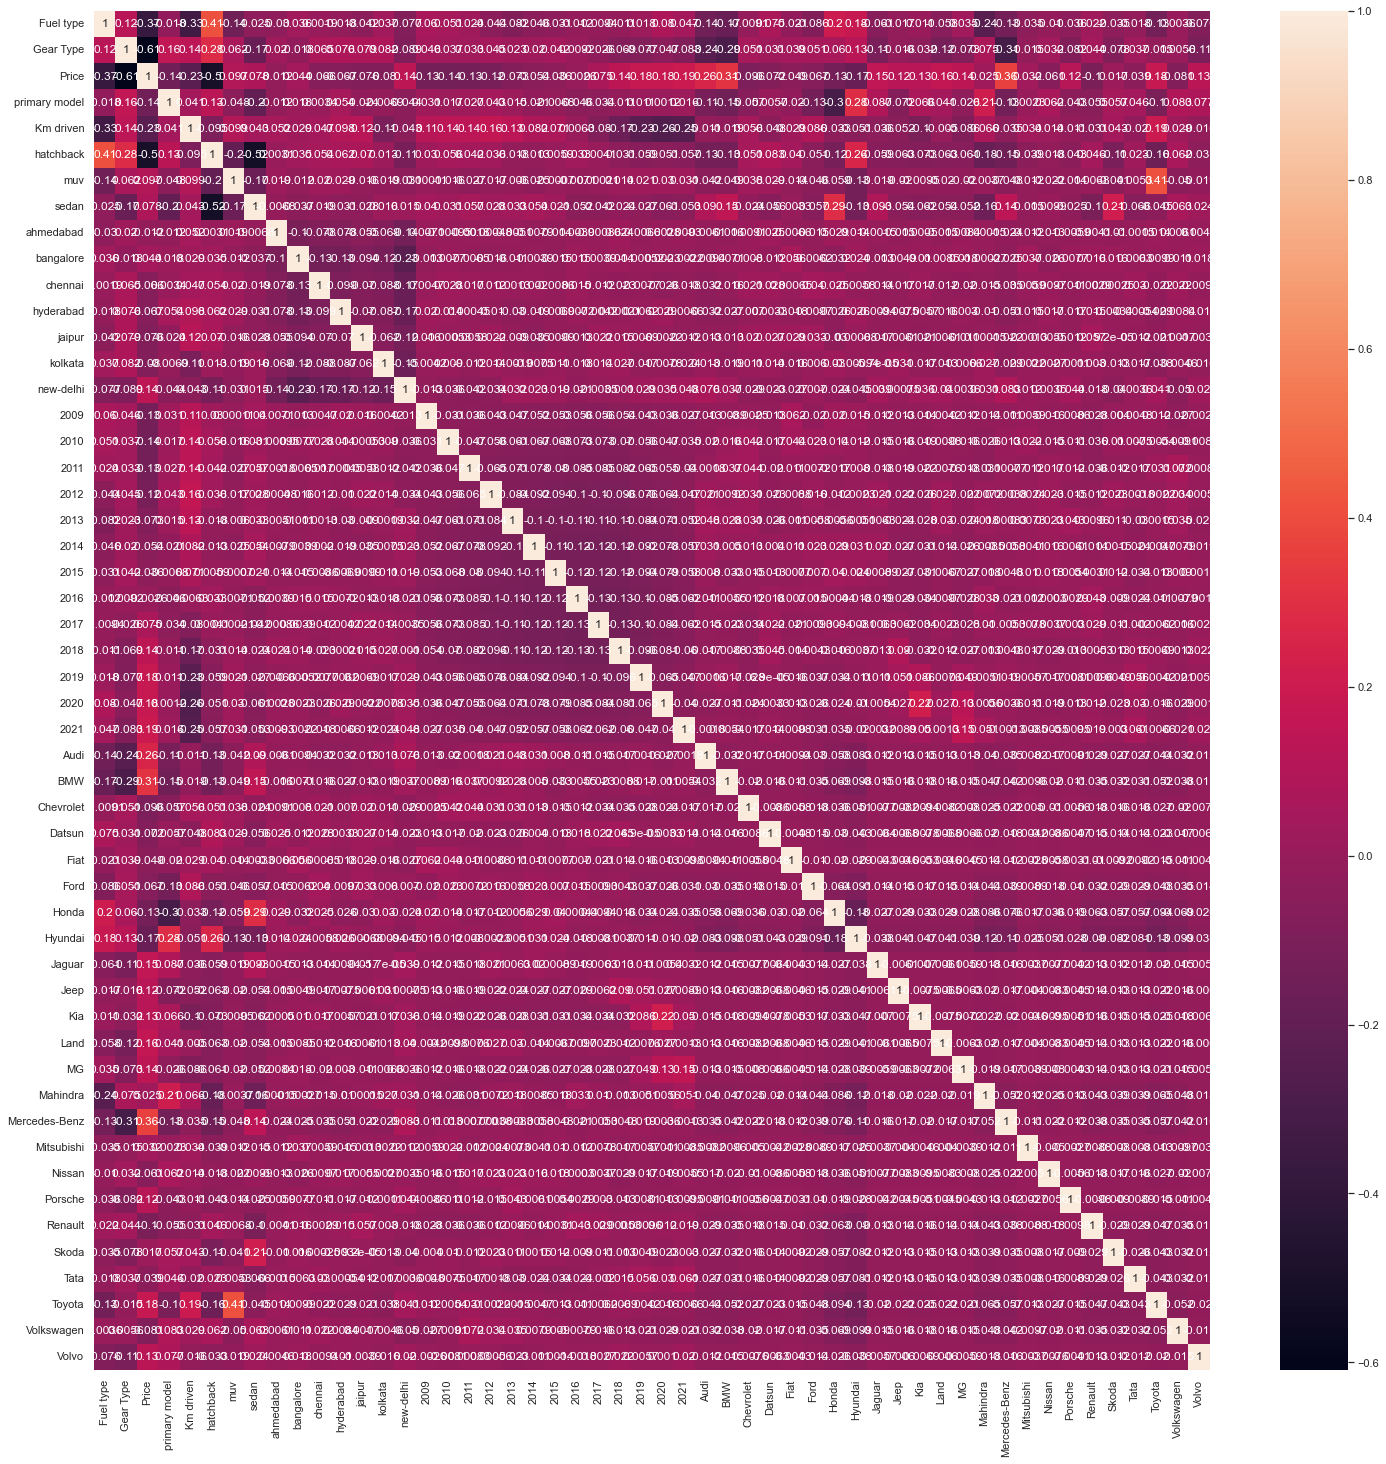

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(cars_datasets.corr(), annot=True)
plt.show()

In [42]:
#separating features from target data
X=cars_datasets.drop(columns=['Price'])
Y=cars_datasets['Price']

In [43]:
#normalizing the data
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [44]:
#checking VIF value
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,Fuel type,1.795545
1,Gear Type,1.694806
2,primary model,1.506796
3,Km driven,2.093208
4,hatchback,2.909099
5,muv,1.494310
6,sedan,2.437052
7,ahmedabad,1.186682
8,bangalore,1.383663
9,chennai,1.262707


Below the keys point in Summarizing the data analysis:

1. Size of the Dataset is 9871 rows and 52 columns.
2. No missing values in the dataset.
2. Converted ordinal data into numerical data
3. outliers have been dealt with.
4. Feature selection of independent data is done via heatmap and VIF value
5. Separated features and prediction variables into two separate list.

# Model Training and Testing

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size= 0.2, random_state=3)

In [49]:
model1=LinearRegression()
model1.fit(X_train,Y_train)
scores1 = cross_val_score(model1, X_test, Y_test, scoring='r2', cv=5)
print('Mean R2 Score for Linear Regression :',mean(scores1),
      '\nStandard Deviation is : ',std(scores1))

Mean R2 Score for Linear Regression : 0.844239967145511 
Standard Deviation is :  0.013781218647555283


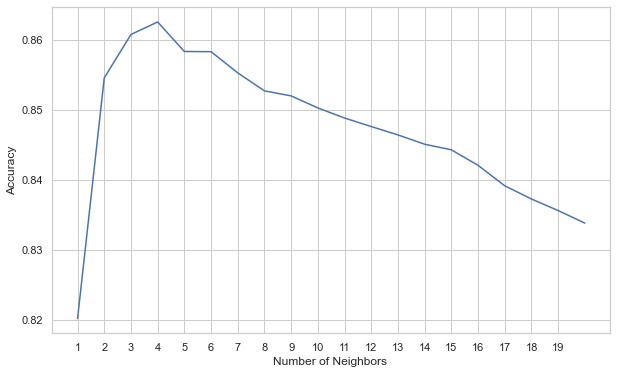

In [65]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat2= knn.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat2)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [66]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[3,4,5,6],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=5, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [67]:
knn_gs.best_score_

0.8869452076042702

In [68]:
knn_gs.best_estimator_

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [60]:
model2=KNeighborsRegressor(n_neighbors=6, weights='distance')
model2.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [61]:
scores2 = cross_val_score(model2, X_test, Y_test, scoring='r2', cv=5)
print('Mean R2 Score for KNeighbors Regression :',mean(scores2),
      '\nStandard Deviation is : ',std(scores2))

Mean R2 Score for KNeighbors Regression : 0.7955949647781784 
Standard Deviation is :  0.019032900400281556


In [71]:
cars_datasets.shape

(9871, 52)

In [75]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [200,250,300],
    'max_depth': [51],
    'learning_rate':[0.15,0.2],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=5,verbose=5)
CV_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=100;, score=0.919 total time=  24.8s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=100;, score=0.902 total time=  24.8s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=100;, score=0.926 total time=  23.5s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=100;, score=0.920 total time=  25.2s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=100;, score=0.929 total time=  24.2s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.919 total time=  43.5s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.902 total time=  44.1s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.9

[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=200;, score=0.916 total time=  57.7s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=200;, score=0.926 total time=  56.8s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.915 total time= 1.5min
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.904 total time= 1.4min
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.924 total time= 1.4min
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.916 total time= 1.4min
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.926 total time= 1.4min
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.915 total time=  39.9s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_d

[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=100;, score=0.924 total time=  28.0s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=100;, score=0.916 total time=  28.3s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=100;, score=0.926 total time=  27.6s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=200;, score=0.915 total time=  49.6s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=200;, score=0.904 total time=  48.9s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=200;, score=0.924 total time=  49.1s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=200;, score=0.916 total time=  50.4s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=51, n_estimators=200, n_jobs=200;, score=0.926 total time=  48.8s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_d

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=250, n_jobs=300;, score=0.902 total time= 1.4min
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=250, n_jobs=300;, score=0.926 total time= 1.4min
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=250, n_jobs=300;, score=0.920 total time= 1.5min
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=250, n_jobs=300;, score=0.929 total time= 1.4min
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=300, n_jobs=100;, score=0.919 total time=  41.1s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=300, n_jobs=100;, score=0.902 total time=  41.4s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=300, n_jobs=100;, score=0.926 total time=  40.8s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=51, n_estimators=300, n_jobs=100;, score=0.920 total time=  42.3s
[CV 5/5] END gamma=0.2, learning_rate=0.

[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.919 total time=  48.9s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.902 total time=  48.7s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.926 total time=  48.4s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.920 total time=  50.5s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=200;, score=0.929 total time=  49.2s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=300;, score=0.919 total time= 1.2min
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=300;, score=0.902 total time= 1.2min
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=51, n_estimators=200, n_jobs=300;, score=0.926 total time= 1.1min
[CV 4/5] END gamma=0.3, learning_rate=0.

[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=250, n_jobs=300;, score=0.926 total time= 1.4min
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.915 total time=  37.3s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.904 total time=  35.5s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.924 total time=  41.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.916 total time=  41.8s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=100;, score=0.926 total time=  41.2s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=200;, score=0.915 total time= 1.1min
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=51, n_estimators=300, n_jobs=200;, score=0.904 total time= 1.1min
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_d

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                       

In [76]:
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [200,250,300],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [51],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [1, 2,3,4],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=5,n_jobs=5,verbose=5)
rfr_gs.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [51],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 250, 300]},
             verbose=5)

In [77]:
gbr=GradientBoostingRegressor()
parameter_gbr_={    
         'n_estimators': [200,250,300,350,400],
         'max_depth': [51],
         'min_samples_split': [2,4,5,6],
         "min_samples_leaf":[1,2,3,4,5],
     'learning_rate':[0.15,0.2],
}
gbr_gs= gs(estimator =gbr, param_grid=parameter_gbr_,cv=5, n_jobs=5)
gbr_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.15, 0.2], 'max_depth': [51],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [200, 250, 300, 350, 400]})

In [79]:
CV_xgb.best_score_

0.9192629686950908

In [80]:
rfr_gs.best_score_

0.9225683184432867

In [82]:
gbr_gs.best_score_

0.9067247304324221

In [83]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=51, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
rfr_gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=51, max_features='sqrt',
                      n_estimators=300)

In [85]:
gbr_gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.15, max_depth=51, min_samples_leaf=5,
                          min_samples_split=4, n_estimators=200)

In [46]:
model3=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=51, min_child_weight=1,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model3.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=51, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
scores3 = cross_val_score(model3, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for XGB Regression :',mean(scores3),
      '\nStandard Deviation is : ',std(scores3))

Mean R2 Score for XGB Regression : 0.8140135957148293 
Standard Deviation is :  0.03825808917601883


In [63]:
model4=RandomForestRegressor(bootstrap=False, max_depth=51, 
                             max_features='sqrt', n_estimators=300)
model4.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=False, max_depth=51, max_features='sqrt',
                      n_estimators=300)

In [64]:
scores4 = cross_val_score(model4, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Random Forest Regression :',mean(scores4)
      ,'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Random Forest Regression : 0.8517433797226925 
Standard Deviation is :  0.030635818273004264


In [50]:
model5=GradientBoostingRegressor(learning_rate=0.15, max_depth=51, min_samples_leaf=5,
                          min_samples_split=4, n_estimators=200)
model5.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=51, min_samples_leaf=5,
                          min_samples_split=4, n_estimators=200)

In [51]:
scores5 = cross_val_score(model5, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for GradientBoosting Regression :',mean(scores5),
      '\nStandard Deviation is : ',std(scores5))

Mean R2 Score for GradientBoosting Regression : 0.8239103840044283 
Standard Deviation is :  0.047654193002608015


In [56]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = gs( \
    lasso, grid, scoring='r2', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, Y_train)
print('R2: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

R2: 0.85340
Config: {'alpha': 0.2}


In [57]:
model6=Lasso(alpha=0.2, max_iter=250, tol=0.1)
model6.fit(X_train,Y_train)

Lasso(alpha=0.2, max_iter=250, tol=0.1)

In [58]:
scores6 = cross_val_score(model6, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Lasso Regression :',mean(scores6),
      '\nStandard Deviation is : ',std(scores6))

Mean R2 Score for Lasso Regression : 0.8246470127449568 
Standard Deviation is :  0.025501909108410624


In [65]:
prediction1=model1.predict(X_test)
prediction2=model2.predict(X_test)
prediction3=model3.predict(X_test)
prediction4=model4.predict(X_test)
prediction5=model5.predict(X_test)
prediction6=model6.predict(X_test)

Linear Regression


(-38575.0, 2710958.720523153, -226160.0166018006, 2523373.7039213525)

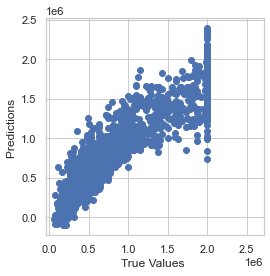

In [66]:
print('\033[1m'+'Linear Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction1)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

KNN Regression


(-38575.0, 2097075.0, -10820.896138642143, 2124829.103861358)

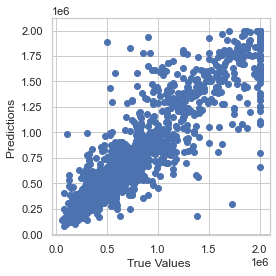

In [67]:
print('\033[1m'+'KNN Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction2)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

XGB Regression


(-38575.0, 2300980.27265625, -28825.85117187501, 2310729.421484375)

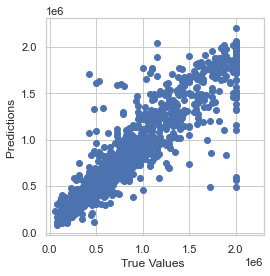

In [68]:
print('\033[1m'+'XGB Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction3)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Random Forest Regression


(-38575.0, 2097075.0, 9016.599999999991, 2144666.6)

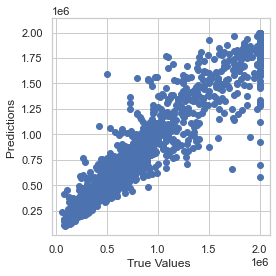

In [70]:
print('\033[1m'+'Random Forest Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction4)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Gradient Boosting Regression


(-38575.0, 2310721.7774999626, -41957.544540896764, 2307339.232959066)

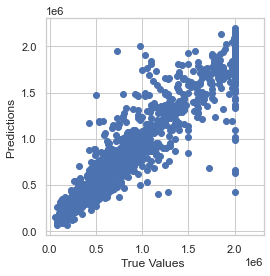

In [71]:
print('\033[1m'+'Gradient Boosting Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction5)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Lasso Regression


(-38575.0, 2850144.9013828007, -341139.6129242332, 2547580.2884585676)

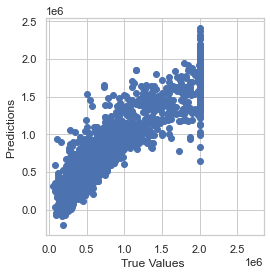

In [72]:
print('\033[1m'+'Lasso Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction6)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Linear Regression is the best suited model for this data as r2 values of predicted and true values are much closely packed and their is less standard deviation compared to all the other models 

In [73]:
#saving the model
Car_pricing_Model= pickle.dumps(model1)